<a id='top'></a>

# CSCI3022 F21
# Homework 9: Simple and Multiple Linear Regression
***

**Name**: Aidan Reese

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 6 Dec**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

**Shortcuts:**  problems 1-4: Anscombe [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) | [5](p#5)---

In [1]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


## [1-4 problems: 9 points/ea]


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.  If the model violates any assumptions, consider the following "corrections:"
 - adding higher powers of $x$ to the model to address concavity/curvature/nonlinearity
 - removing outlying data points, and explaining how this affects the model **inference**
 - removing high leverage data points, and explaining how this affects the model **inference**
 - doing nothing, but describing which assumptions might be broken and some possible implications


In [2]:
df = sns.load_dataset("anscombe")

df['dataset'].unique()
print(df.head())

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [9 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [35]:
dfI = df.loc[df['dataset']=='I']

y, xTv = dmatrices('y ~ x', data = dfI)

lml = sm.OLS(y,xTv).fit()
lml.summary()

C:\Users\aidan\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00217
Time:                        16:52:02   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Model : $ f(x) = \frac{1}{2} x + 3 $


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Scatter plot x by residuals')

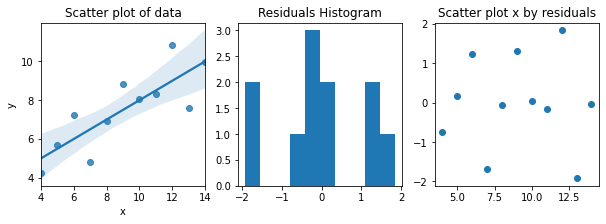

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.regplot(x="x",y="y", data = dfI, ax = axes[0])
axes[0].set_title("Scatter plot of data")

axes[1].hist(lml.resid)
axes[1].set_title("Residuals Histogram")

axes[2].scatter(x = dfI['x'], y = lml.resid)
axes[2].set_title("Scatter plot x by residuals")



#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

Linearity - It defenitly represents linearity, while near the outliers on the positive and negative seem to be less so.

Homoscedasticity - It fits somewhat, the data seems to be much more variant farther away from the mean.

Independance - Yes, the data is independant from eachother and does not seem to have an effect on eachother.

Normality - XY values are well evenly distributed across.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another table and set of plots as in parts A and B of the new fit and the new residuals.

Because the outliers are not extreme, there is no need to adjust the data to fit.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

Because the data fits pretty well into our assumptions and there was nothing I could easily point out that the 4 assumtions didn't match, I think its safe to say that it fits a linear regression model.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [9 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [59]:
dfII = df.loc[df['dataset']=='II']

y, xTv = dmatrices('y ~ x', data = dfII)

lm2 = sm.OLS(y,xTv).fit()
lm2.summary()


C:\Users\aidan\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00218
Time:                        17:42:38   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Model $ y = \frac{1}{2}x + 3 $


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Scatter plot x by residuals')

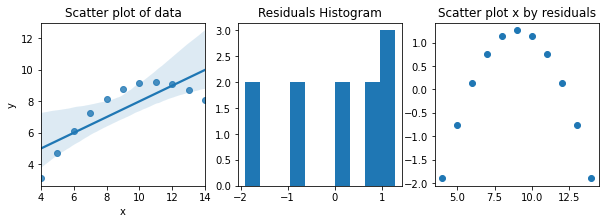

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.regplot(x="x",y="y", data = dfII, ax = axes[0])
axes[0].set_title("Scatter plot of data")

axes[1].hist(lm2.resid)
axes[1].set_title("Residuals Histogram")

axes[2].scatter(x = dfII['x'], y = lm2.resid)
axes[2].set_title("Scatter plot x by residuals")


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

Linearity - No, this is very clearly a function of a polinomial

Homoscedasticity - Yes , the residual is pretty standard through the data

Independance - No the data clearly is a function of something and the data relys on eachother.

Normality - XY values are well evenly distributed across.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

<ipython-input-62-6dc3476b7b43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfII['xsq'] = dfII['x']**2
C:\Users\aidan\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.0, 'Scatter plot x by residuals')

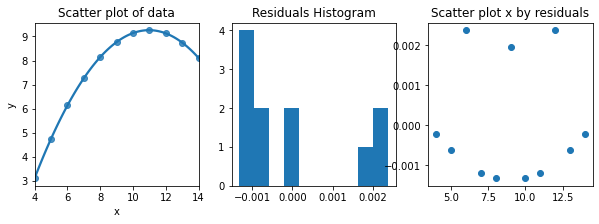

In [62]:
dfII['xsq'] = dfII['x']**2
y, xTv = dmatrices('y ~ x+xsq', data = dfII)

lm2 = sm.OLS(y,xTv).fit()
lm2.summary()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.regplot(x="x",y="y", data = dfII, ax = axes[0], order = 2)
axes[0].set_title("Scatter plot of data")

axes[1].hist(lm2.resid)
axes[1].set_title("Residuals Histogram")

axes[2].scatter(x = dfII['x'], y = lm2.resid)
axes[2].set_title("Scatter plot x by residuals")

Adjusted the model so that the order is equal to 2 so the line of best fit matches the curve of the data much better.  Clearly the data is much closer to the line than previous plots

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [9 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [63]:
dfIII = df.loc[df['dataset']=='III']

y, xTv = dmatrices('y ~ x', data = dfIII)

lm3 = sm.OLS(y,xTv).fit()
lm3.summary()


C:\Users\aidan\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00218
Time:                        17:50:59   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Model : $ f(x) = \frac{1}{2} x + 3 $


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Scatter plot x by residuals')

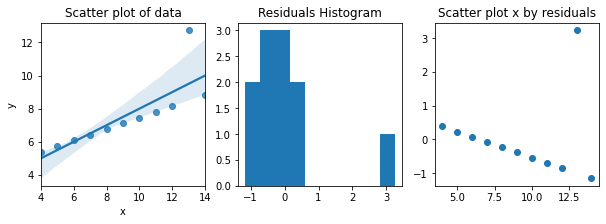

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.regplot(x="x",y="y", data = dfIII, ax = axes[0])
axes[0].set_title("Scatter plot of data")

axes[1].hist(lm3.resid)
axes[1].set_title("Residuals Histogram")

axes[2].scatter(x = dfII['x'], y = lm3.resid)
axes[2].set_title("Scatter plot x by residuals")


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

Linearity - The data is very linear outside of the single outlier that scews the whole data set.

Homoscedasticity - The variance is somewhat large because of the outlier moving the line of best fit away from most of the data.

Independance - The data seems to be independent due to the small variations along the main line of data

Normality - XY values are well evenly distributed across.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

Text(0.5, 1.0, 'Scatter plot x by residuals')

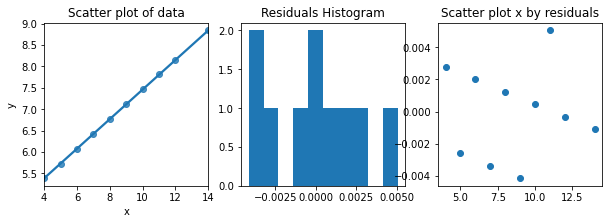

In [69]:
tdf3 = dfIII.drop(labels=24, axis = 0 )

y, xTv = dmatrices('y ~ x', data = tdf3)

lm3 = sm.OLS(y,xTv).fit()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.regplot(x="x",y="y", data = tdf3, ax = axes[0])
axes[0].set_title("Scatter plot of data")

axes[1].hist(lm3.resid)
axes[1].set_title("Residuals Histogram")

axes[2].scatter(x = tdf3['x'], y = lm3.resid)
axes[2].set_title("Scatter plot x by residuals")


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

After removing the one extreme outlier the data becomed much more linear and fits the line nearly perfectly.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [9 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.

#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [72]:
dfIV = df.loc[df['dataset']=='IV']

y, xTv = dmatrices('y ~ x', data = dfIV)

lm4 = sm.OLS(y,xTv).fit()
lm4.summary()

C:\Users\aidan\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00216
Time:                        18:25:45   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Model : $ f(x) = \frac{1}{2} x + 3 $


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.regplot(x="x",y="y", data = dfIV, ax = axes[0])
axes[0].set_title("Scatter plot of data")

axes[1].hist(lm4.resid)
axes[1].set_title("Residuals Histogram")

axes[2].scatter(x = dfIV['x'], y = lm4.resid)
axes[2].set_title("Scatter plot x by residuals")


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

Linearity - The data does not seem linear, the outlier makes the linearity way off. Most of the data is based on the left and not well distributed.

Homoscedasticity - Variance is incredibly high as the data is not even at all.

Independance - The data is probably independent, the data is well spread across the Y axis but not the X.

Normality - They are not distributed normally.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

More data would be preffered to figure out the 4 major assumptions and how we could modify the data.  Because the data model isn't linear even after the outlier, we simply just need more data to work with.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The model can't be adjusted properly without more data.

<br>

---
<a/ id='p5'></a>
[Back to top](#top)
## [9 points] Problem 5: Seasonal Data

The data set `pressuretime` is loaded in below, in which a pressure differential between two islands in the sourthern Pacific is recorded monthly.

- `y` is the pressure differential between islands
- `x` is in months of the year.  Whether or not the initial month is January is not provided.

In [74]:
dfpt=pd.read_csv('../data/pressuretime.csv')
dfpt.head()

,y,x
0,12.9,1
1,11.3,2
2,10.6,3
3,11.2,4
4,10.9,5



#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [75]:
y, xTv = dmatrices('y ~ x', data = dfpt)

lm5 = sm.OLS(y,xTv).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.188
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.277
Time:                        18:39:18   Log-Likelihood:                -444.28
No. Observations:                 168   AIC:                             892.6
Df Residuals:                     166   BIC:                             898.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1396      0.531     19.092      0.000       9.091      11.188
x              0.0059      0.005      1.090      0.277      -0.005       0.017
==============================================================================
Omnibus:                        6.225   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.158
Skew:                          -0.469   Prob(JB):                       0.0460
Kurtosis:                       3.035   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Model : $ f(x) = .006 x + 10.14 $


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

You may want to zoom in on the x-axis a little to try to notice if there are +/- clumpings of the residuals...

Text(0.5, 1.0, 'Scatter plot x by residuals')

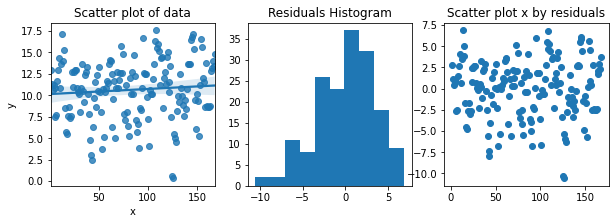

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

sns.regplot(x="x",y="y", data = dfpt, ax = axes[0])
axes[0].set_title("Scatter plot of data")

axes[1].hist(lm5.resid)
axes[1].set_title("Residuals Histogram")

axes[2].scatter(x = dfpt['x'], y = lm5.resid)
axes[2].set_title("Scatter plot x by residuals")


#### Part C: Fixing Periodic data.  Because the data is seasonal, there are often annual cycles that play into the process.  Instead of fitting with a polynomial and higher powers of $x$, we can fit with trigonmetric functions that include the those frequencies/periodicities of the data.

Create two new columns that are $x_s=\sin(x*\frac{2\pi}{12})$ and  $x_c=\cos(x*\frac{2\pi}{12})$.  These represent functions that repeat themselves every **12** months, or annually.

Instead of fitting the usual intercept and slope for 1-D data, instead find the coefficients of the sine and cosine form the model $p=\beta_0+ \beta_s*x_s+\beta_c*x_c$.  (So give `statsmodels` the two new columns and an intercept column, but not the original `x`).

Note: a linear combination of same-phase $\sin$ and $\cos$ is the equivalent to fitting a single function of the form $y=a \sin(x+b)$, or we're already including both a phase shift and an amplitude of a **single** period-12 sinusoid here.  As a rule of thumb, always include both sine and cosine for this type of problem!

Text(0.5, 1.0, 'Scatter plot x by residuals')

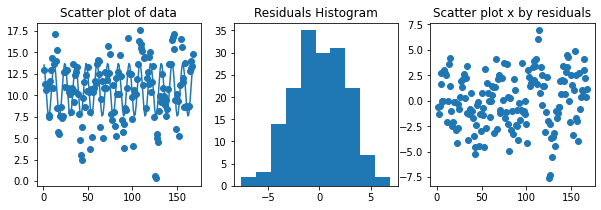

In [94]:
dfpt['sx'] = np.sin(dfpt['x']*(2*np.pi)/12)
dfpt['cx'] = np.cos(dfpt['x']*(2*np.pi)/12)
dfpt['intercept'] = 10.1396
y, xTv = dmatrices('y ~ cx + sx + intercept', data = dfpt)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))


lm5 = sm.OLS(y,xTv).fit()
lm5.summary()

axes[0].scatter(dfpt['x'],dfpt['y'])
axes[0].plot(dfpt['x'], lm5.fittedvalues)

axes[0].set_title("Scatter plot of data")

axes[1].hist(lm5.resid)
axes[1].set_title("Residuals Histogram")

axes[2].scatter(x = dfpt['x'], y = lm5.resid)
axes[2].set_title("Scatter plot x by residuals")

#### Part D: Plot the fit, histogram the errors, and plot the errors of the trigonmetic error, as in part B above.  Is it better?

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

#### Part E (extra credit, up to 5 points):  

It turns out, the *best* trigonometric model for this data includes more sinusoids than just the ones of annual period, above.  If you want to quickly check what **periods** might exist in your data, an **autocorrelation** function (acf) of a (regularly-spaced) data set measures what at what time-lags your data value exhibit patterns.

Use `sm.tsa.stattools.acf` to detect which *other* time lags you might want to use the model this data, in addition to the period of 12 months used above.  To find these:

- Find $x$, the location of the local maxima (after $t=0$) of the .acf function.  Choose the earliest values that are not multiples of one another; e.g. a spike at $t=12$ should also cause a spike at $t=24$, since they're on the same frequency.  Look for clear maxima, not minor perturbations.

- Include both $\sin(2*\pi/x)$ and $\cos(2*\pi/x)$ in your next update of your model (as well as all previously included terms), and check that your adjusted $R^2$ has improved.

- Repeat until there is no additional maxima of the acf that exceed .15, or none of the maxima you try seem to improve the model, or the acf looks relatively unpatterned (centered about 0).

[0.26659748 0.30498965 0.20116916]


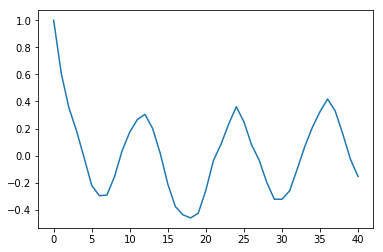

In [4]:
#since this is the original data, we notice a max around 12 (that repeats at 24, 36, etc.)!
acf=sm.tsa.stattools.acf(dfpt['y'])
plt.plot(acf)
print(acf[11:14])